# GRIP June 2021 Assignment

# Author : Sneha Kapoor

# Task 1 : Prediction using Supervised ML

# Predicting score of student based on number of hours studied

In [7]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Dataset

df=pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


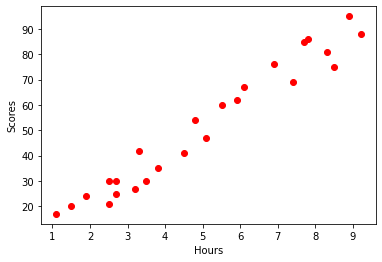

In [4]:
# Visualizing Data

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='red')
plt.show()

# The above Scatter plot indicates positive linear relationship

In [8]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
#Splitting data into train and test with 80:20 ratio

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', X_test.shape, Y_test.shape)

Train set: (20, 1) (20,)
Test set: (5, 1) (5,)


In [13]:
# Training and fitting the model

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [17]:
linreg.fit(X_train,Y_train)

LinearRegression()

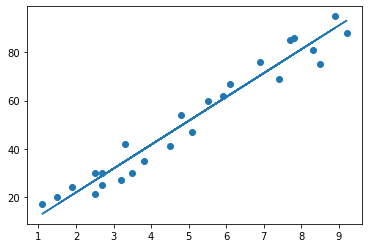

In [36]:
#Regression line

line=linreg.coef_*X+linreg.intercept_
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

In [23]:
# Comparing actual and predicted scores

Y_pred = linreg.predict(X_test)
df = pd.DataFrame({'Actual score': Y_test, 'Predicted score': Y_pred})  
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
# Model evaluation

from sklearn import metrics
print('Accuracy:',metrics.r2_score(Y_test,Y_pred))

Accuracy: 0.9454906892105356


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


In [32]:
# Predicting score

hours = 9.25
score = linreg.predict([[hours]])
pd.DataFrame({'Hours': hours, 'Predicted Score': score})

,Hours,Predicted Score
0,9.25,93.691732


# Hence if a student studies for 9.25hrs/day then the score will be 93%